# Capstone Project - The Battle of the Neighborhoods


## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

**What kinds of restaurants should you open in the proximity of Chinese restaurants in Toronto, Canada?**

There are thousands of restaurants in Toronto, Canada. They offer many choices to the consumers in Toronto which is very diverse in terms of ethnic groups, religion, cultural backgrounds. There are a lot of immigrants coming from the world. According to Toronto municipal statistics, 47% of the population in Toronto are immigrants. Based on Wikipedia, there are 631,050 Chinese in the Greater Toronto Area as of the 2016 census, second only to New York City for largest Chinese community in North America. 

Chinese food is popular. Chinese restaurants are operating everywhere in the greater Toronto area. Therefore, there is fierce competition if a business owner wants to open a Chinese restaurant. It is natural for the business owner to consider other types of restaurants for Toronto area.

**Criteria**

The restaurant business will probably succeed, if the following criteria are met:
<ol>
<li>In proximity of Chinese restaurants</li>
<li>The target category must be more positively correlated to Chinese restaurant than other restaurant categories.</li>
<li>The most common type of restaurant near Chinese restaurants</li>
</ol> 

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:
* The restaurants in the greater Toronto area and their categories (e.g., Asian, Japanese, Vietnamese, etc.)
* The coordinates of Chinese restaurants
* What are the restaurents that are operating in proximity of Chinese restaurants? 


Following data sources will be needed to extract/generate the required information:
* For each Chinese restaurant in the Toronto area, the nearby restaurants (location, category) will be collected.
* number of restaurants and their type and location will be obtained using **Foursquare API**

The final data frame will contain the following information:
* Chinese restaurant's name, latitude, longtitude
* All the restaurants in the proximity of Chinese restaurants
* The data will be grouped by Chinese restaurants
* The relative frequencies of each restaurant category by be presented in bar charts.

## Methodology <a name="methodology"></a>

The target area is the greater Toronto area located in Ontario, Canada. To find out what restaurants are operating in the proximity of Chinese restaurants, we will need to understand the overall distribution of all restaurants. To answer the problem in this study, we will complete the following tasks:

<ol>
<li>Find out all restaurants in the greaterr Toronto area;</li>
<li>Find out the Chinese restaurants;</li>
<li>Use FourSquare API to find out the restaurants in the proximity of Chinese restaurants;</li>
<li>Merge all the relevant data into the final dataframe; and</li>
<li>Conduct exploratory study.</li>
</ol>

## Analysis <a name="analysis"></a>

### Find out all restaurants in the greaterr Toronto area

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### read the dataset csv file

In [2]:
restaurants = pd.read_csv("trt_rest.csv")
restaurants.head(15)

,Category,Restaurant Address,Restaurant Name,Restaurant Phone,Restaurant Price Range,Restaurant Website,Restaurant Yelp URL,Restaurant Latitude,Restaurant Longitude
0,Afghan,"14 Prince Arthur Avenue\nToronto, ON M5R 1A9",The Host,(416) 962-4678,$11-30,welcometohost.com,https://www.yelp.ca/adredir?ad_business_id=OFA...,43.669935,-79.395858
1,Afghan,"259 Wellington St W\nToronto, ON M5V",Aanch Modernist Indian Cuisine,(647) 558-1508,$11-30,aanch.ca,https://www.yelp.ca/adredir?ad_business_id=SZu...,43.644708,-79.390670
2,Afghan,"736 Bay Street\nToronto, ON M5G 2J8",Silk Road Kabob House,NaN,Under $10,NaN,https://www.yelp.ca/biz/silk-road-kabob-house-...,43.659816,-79.385591
3,Afghan,"691 Yonge Street\nToronto, ON M4Y 2B2",Naan & Kabob,(416) 972-6623,$11-30,naanandkabob.ca,https://www.yelp.ca/biz/naan-and-kabob-toronto-5,43.669058,-79.386100
4,Afghan,"66 Overlea Boulevard\nUnit 62\nToronto, ON M4H...",Afghan Cuisine,(416) 422-5858,$11-30,afghancuisinerestaurant.com,https://www.yelp.ca/biz/afghan-cuisine-toronto,43.708070,-79.341508
5,Afghan,"119 Spadina Avenue\nUnit 101\nToronto, ON M5V 2L1",Pamier Kabob,(647) 352-2623,$11-30,pamier-kabob.com,https://www.yelp.ca/biz/pamier-kabob-toronto,43.647210,-79.395473
6,Afghan,"4205 Keele St\nToronto, ON M3J 2N8",Bamiyan Kabob,(416) 650-0111,$11-30,bamiyankabob.com,https://www.yelp.ca/biz/bamiyan-kabob-toronto,43.773829,-79.492068
7,Afghan,"2307 Markham Road\nToronto, ON M1B 2W3",Kandahar Kabab,(416) 609-8666,$11-30,kandaharkabab.com,https://www.yelp.ca/biz/kandahar-kabab-toronto,43.812544,-79.242368
8,Afghan,"707 Dundas Street W\nToronto, ON M5T 2W6",Mazar’s Kitchen,(647) 868-4290,NaN,NaN,https://www.yelp.ca/biz/mazars-kitchen-toronto,43.651766,-79.404965
9,Afghan,"2298A Islington Avenue\nToronto, ON M9W 3X2",Afghan Kebob Cuisine,(416) 546-4238,Under $10,afghankebobcuisine.com,https://www.yelp.ca/biz/afghan-kebob-cuisine-t...,43.716049,-79.555686


In [3]:
# check the shape of the dataframe
restaurants.shape

(15821, 9)

#### understand the categories of all restaurants in the greater Toronto area

In [4]:
rest_types = pd.DataFrame(restaurants["Category"].value_counts(normalize=True))

rest_types.insert(loc=0, column="Ttype", value=list(rest_types.index))
rest_types.reset_index(drop=True, inplace=True)
rest_types.columns = ["Category", "Ratio"]

In [5]:
rest_types

,Category,Ratio
0,Pizza,0.067316
1,Sandwiches,0.065040
2,Chinese,0.057455
3,Fast Food,0.051324
4,Italian,0.050755
...,...,...
121,Fondue,0.000126
122,Haitian,0.000126
123,Mauritius,0.000063
124,Pop-Up Restaurants,0.000063


### OBSERVATION

This table shows the top five most common restaurants are pizza, sandwiches, Chinese, fast food, and Italian food.
Let us show the observation in a bar chart.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Pizza'),
  Text(0, 1, 'Sandwiches'),
  Text(0, 2, 'Chinese'),
  Text(0, 3, 'Fast Food'),
  Text(0, 4, 'Italian'),
  Text(0, 5, 'Breakfast & Brunch'),
  Text(0, 6, 'Cafes'),
  Text(0, 7, 'Burgers'),
  Text(0, 8, 'Japanese'),
  Text(0, 9, 'Canadian (New)')])

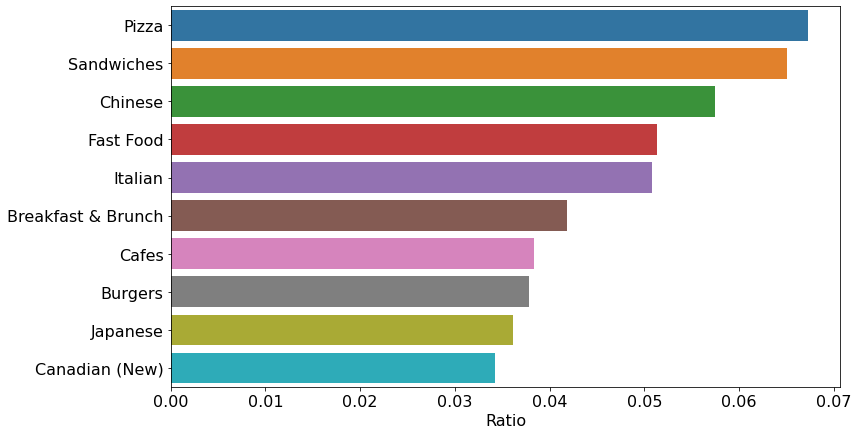

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
top10 = rest_types.loc[0:9, :]
sns.barplot(x="Ratio", y="Category", data=top10)
plt.ylabel("")
plt.xlabel("Ratio",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [7]:
Chinese_restaurants = restaurants[restaurants["Category"] == "Chinese"]
Chinese_restaurants.reset_index(drop=True, inplace=True)
Chinese_restaurants.head(10)

,Category,Restaurant Address,Restaurant Name,Restaurant Phone,Restaurant Price Range,Restaurant Website,Restaurant Yelp URL,Restaurant Latitude,Restaurant Longitude
0,Chinese,"309 Spadina Avenue\nToronto, ON M5T 2E6",Swatow Restaurant,(416) 977-0601,$11-30,NaN,https://www.yelp.ca/biz/swatow-restaurant-toronto,43.653836,-79.398109
1,Chinese,"66 Edward Street\nToronto, ON M5G 1C9",GB Hand-pulled Noodles,NaN,$11-30,NaN,https://www.yelp.ca/biz/gb-hand-pulled-noodles...,43.656641,-79.383747
2,Chinese,"214 King Street W\nToronto, ON M5H 3S6",Lee Chen Asian Bistro,(416) 519-8688,$11-30,leechenbistro.com,https://www.yelp.ca/biz/lee-chen-asian-bistro-...,43.647369,-79.386763
3,Chinese,"328 Spadina Avenue\nToronto, ON M5T 2E7",Dumpling House Restaurant,(416) 596-8898,Under $10,NaN,https://www.yelp.ca/biz/dumpling-house-restaur...,43.653790,-79.398698
4,Chinese,"503 College Street\nToronto, ON M6G 1A5",DaiLo,(647) 341-8882,$31-60,dailoto.com,https://www.yelp.ca/biz/dailo-toronto,43.655808,-79.409905
5,Chinese,"2181 Bloor Street W\nToronto, ON M6S 1N2",Delights of China,(416) 762-2888,Under $10,NaN,https://www.yelp.ca/biz/delights-of-china-toronto,43.651263,-79.474637
6,Chinese,DoubleTree by Hilton,Lai Wah Heen,(416) 977-9899,$31-60,laiwahheen.com,https://www.yelp.ca/biz/lai-wah-heen-toronto,43.654671,-79.386172
7,Chinese,"472 Dundas Street W\nToronto, ON M5T 1G8",Hong Kong Bistro Cafe,(416) 598-9188,Under $10,NaN,https://www.yelp.ca/biz/hong-kong-bistro-cafe-...,43.653312,-79.396844
8,Chinese,"263 Spadina Avenue\nToronto, ON M5T 2E3",Homemade Ramen,(647) 352-6068,Under $10,NaN,https://www.yelp.ca/biz/homemade-ramen-toronto,43.652390,-79.397391
9,Chinese,"123 Queen Street W\nToronto, ON M5H 3M9",Noodle King,(416) 861-9398,Under $10,NaN,https://www.yelp.ca/biz/noodle-king-toronto,43.651181,-79.384465


In [8]:
Chinese_restaurants.shape

(909, 9)

In [9]:
Chinese_restaurants.dtypes

Category                   object
Restaurant Address         object
Restaurant Name            object
Restaurant Phone           object
Restaurant Price Range     object
Restaurant Website         object
Restaurant Yelp URL        object
Restaurant Latitude       float64
Restaurant Longitude      float64
dtype: object

#### Presenting Chinese restaurants in the map

In [10]:
latitude = 43.6534817
longitude = -79.3839347

map_restaurants = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi in zip(Chinese_restaurants['Restaurant Latitude'], Chinese_restaurants['Restaurant Longitude'], Chinese_restaurants['Restaurant Name']):
    label = folium.Popup(str(poi), parse_html=True)
    try:
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.4,).add_to(map_restaurants)
    except:
        pass

map_restaurants

In [11]:
all_categories = list(restaurants["Category"].unique())
k0 = len(all_categories)
k0

126

In [12]:
# map_restaurants_b = folium.Map(location=[latitude, longitude], zoom_start=11)

# # set color scheme for the clusters
# x = np.arange(k0)
# ys = [i + x + (i*x)**2 for i in range(k0)]
# colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
# rainbow = [colors.rgb2hex(i) for i in colors_array]

# # add markers to the map
# markers_colors = []
# for lat, lon, poi, Rest_type in zip(restaurants['Restaurant Latitude'], restaurants['Restaurant Longitude'], restaurants['Restaurant Name'], restaurants['Category']):
#     label = folium.Popup(str(poi) + ' Type ' + str(Rest_type), parse_html=True)
#     try:
#         folium.CircleMarker(
#             [lat, lon],
#             radius=3,
#             popup=label,
#             color=rainbow[all_categories.index(Rest_type)],
#             fill=True,
#             fill_color=rainbow[all_categories.index(Rest_type)-1],
#             fill_opacity=0.6).add_to(map_restaurants_b)
#     except:
#         pass
       
# map_restaurants_b

In [13]:
restaurants.head(10)

,Category,Restaurant Address,Restaurant Name,Restaurant Phone,Restaurant Price Range,Restaurant Website,Restaurant Yelp URL,Restaurant Latitude,Restaurant Longitude
0,Afghan,"14 Prince Arthur Avenue\nToronto, ON M5R 1A9",The Host,(416) 962-4678,$11-30,welcometohost.com,https://www.yelp.ca/adredir?ad_business_id=OFA...,43.669935,-79.395858
1,Afghan,"259 Wellington St W\nToronto, ON M5V",Aanch Modernist Indian Cuisine,(647) 558-1508,$11-30,aanch.ca,https://www.yelp.ca/adredir?ad_business_id=SZu...,43.644708,-79.390670
2,Afghan,"736 Bay Street\nToronto, ON M5G 2J8",Silk Road Kabob House,NaN,Under $10,NaN,https://www.yelp.ca/biz/silk-road-kabob-house-...,43.659816,-79.385591
3,Afghan,"691 Yonge Street\nToronto, ON M4Y 2B2",Naan & Kabob,(416) 972-6623,$11-30,naanandkabob.ca,https://www.yelp.ca/biz/naan-and-kabob-toronto-5,43.669058,-79.386100
4,Afghan,"66 Overlea Boulevard\nUnit 62\nToronto, ON M4H...",Afghan Cuisine,(416) 422-5858,$11-30,afghancuisinerestaurant.com,https://www.yelp.ca/biz/afghan-cuisine-toronto,43.708070,-79.341508
5,Afghan,"119 Spadina Avenue\nUnit 101\nToronto, ON M5V 2L1",Pamier Kabob,(647) 352-2623,$11-30,pamier-kabob.com,https://www.yelp.ca/biz/pamier-kabob-toronto,43.647210,-79.395473
6,Afghan,"4205 Keele St\nToronto, ON M3J 2N8",Bamiyan Kabob,(416) 650-0111,$11-30,bamiyankabob.com,https://www.yelp.ca/biz/bamiyan-kabob-toronto,43.773829,-79.492068
7,Afghan,"2307 Markham Road\nToronto, ON M1B 2W3",Kandahar Kabab,(416) 609-8666,$11-30,kandaharkabab.com,https://www.yelp.ca/biz/kandahar-kabab-toronto,43.812544,-79.242368
8,Afghan,"707 Dundas Street W\nToronto, ON M5T 2W6",Mazar’s Kitchen,(647) 868-4290,NaN,NaN,https://www.yelp.ca/biz/mazars-kitchen-toronto,43.651766,-79.404965
9,Afghan,"2298A Islington Avenue\nToronto, ON M9W 3X2",Afghan Kebob Cuisine,(416) 546-4238,Under $10,afghankebobcuisine.com,https://www.yelp.ca/biz/afghan-kebob-cuisine-t...,43.716049,-79.555686


#### removing the rows that have missing latitude or longitude

In [14]:
cr1 = Chinese_restaurants.copy()
cr1.dropna(axis=0, subset=["Restaurant Latitude", "Restaurant Longitude"], inplace=True)
cr1.shape

(904, 9)

### Find out the restaurants in the proximity of these coordinates using FourSqure API

#### Define Foursquare Credentials and Version

In [15]:
# @hidden_cell
# I put FAKE ID and SECRETE HERE to protect my privacy
CLIENT_ID = 'ABCABC' # your Foursquare ID
CLIENT_SECRET = 'ABCABC' # your Foursquare Secret
VERSION = '20210619' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
# @hidden_cell

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
# This function will return all the restaurants near Chinese restaurants by their latitude and longitude values
def get_restaurants(names, latitudes, longitudes, radius=600):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results if "Restaurant" in v['venue']['categories'][0]['name']])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Chinese Restaurant', 
                  'CR Latitude', 
                  'CR Longitude', 
                  'Nearby Restaurant', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

### Extracting the data of Restaurants from the venues using *FourSquare API*

In [18]:
restaurant0 = get_restaurants(cr1['Restaurant Name'], cr1['Restaurant Latitude'], cr1['Restaurant Longitude'], radius=500)
print("Getting the data.")
restaurant0.head(15)

Getting the data.


,Chinese Restaurant,CR Latitude,CR Longitude,Nearby Restaurant,Venue Latitude,Venue Longitude,Venue Category
0,Swatow Restaurant,43.653836,-79.398109,Banh Mi Nguyen Huong,43.653628,-79.398376,Vietnamese Restaurant
1,Swatow Restaurant,43.653836,-79.398109,Seven Lives - Tacos y Mariscos,43.654418,-79.400545,Mexican Restaurant
2,Swatow Restaurant,43.653836,-79.398109,Xam Yu,43.655108,-79.398882,Chinese Restaurant
3,Swatow Restaurant,43.653836,-79.398109,FILM CAFE,43.655109,-79.402342,Comfort Food Restaurant
4,Swatow Restaurant,43.653836,-79.398109,Thai Country Kitchen,43.656159,-79.399423,Thai Restaurant
5,Swatow Restaurant,43.653836,-79.398109,Wafels and More,43.654651,-79.401977,Belgian Restaurant
6,Swatow Restaurant,43.653836,-79.398109,Hibiscus,43.655454,-79.402439,Vegetarian / Vegan Restaurant
7,Swatow Restaurant,43.653836,-79.398109,Urban Herbivore,43.656193,-79.402673,Vegetarian / Vegan Restaurant
8,Swatow Restaurant,43.653836,-79.398109,Vegetarian Haven,43.656016,-79.392758,Vegetarian / Vegan Restaurant
9,Swatow Restaurant,43.653836,-79.398109,El Trompo,43.655832,-79.402561,Mexican Restaurant


In [19]:
restaurant0.shape

(8050, 7)

In [20]:
restaurant0 = restaurant0[restaurant0["Chinese Restaurant"] != restaurant0["Nearby Restaurant"]]
restaurant0.shape

(8005, 7)

In [21]:
cat1 = list(restaurant0["Venue Category"])
cat1 = [a.strip("Restaurant") for a in cat1]
cat1 = [a.strip() for a in cat1]

for i, t in enumerate(cat1):
    if t == '':
        cat1[i] = "Restaurant"

     

In [22]:
restaurant0["Venue Category"] = cat1
restaurant0.head(10)

,Chinese Restaurant,CR Latitude,CR Longitude,Nearby Restaurant,Venue Latitude,Venue Longitude,Venue Category
0,Swatow Restaurant,43.653836,-79.398109,Banh Mi Nguyen Huong,43.653628,-79.398376,Vietnamese
1,Swatow Restaurant,43.653836,-79.398109,Seven Lives - Tacos y Mariscos,43.654418,-79.400545,Mexican
2,Swatow Restaurant,43.653836,-79.398109,Xam Yu,43.655108,-79.398882,Chinese
3,Swatow Restaurant,43.653836,-79.398109,FILM CAFE,43.655109,-79.402342,Comfort Food
4,Swatow Restaurant,43.653836,-79.398109,Thai Country Kitchen,43.656159,-79.399423,Thai
5,Swatow Restaurant,43.653836,-79.398109,Wafels and More,43.654651,-79.401977,Belgian
6,Swatow Restaurant,43.653836,-79.398109,Hibiscus,43.655454,-79.402439,Vegetarian / Vegan
7,Swatow Restaurant,43.653836,-79.398109,Urban Herbivore,43.656193,-79.402673,Vegetarian / Vegan
8,Swatow Restaurant,43.653836,-79.398109,Vegetarian Haven,43.656016,-79.392758,Vegetarian / Vegan
9,Swatow Restaurant,43.653836,-79.398109,El Trompo,43.655832,-79.402561,Mexican


In [23]:
new_categories = list(restaurant0["Venue Category"].unique())
k1 = len(new_categories)
k1

79

In [24]:
category_count2 = pd.DataFrame(restaurant0["Venue Category"].value_counts(normalize=True))

In [25]:
category_count2.insert(loc=0, column="T", value=new_categories)
category_count2.reset_index(drop=True, inplace=True)
category_count2.columns = ["Category", "Ratio-cn"]
category_count2

,Category,Ratio-cn
0,Vietnamese,0.114928
1,Mexican,0.079076
2,Chinese,0.065584
3,Comfort Food,0.065209
4,Thai,0.057589
...,...,...
74,Indian Chinese,0.000125
75,Burmese,0.000125
76,Kebab,0.000125
77,Hakka,0.000125


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Vietnamese'),
  Text(0, 1, 'Mexican'),
  Text(0, 2, 'Chinese'),
  Text(0, 3, 'Comfort Food'),
  Text(0, 4, 'Thai'),
  Text(0, 5, 'Belgian'),
  Text(0, 6, 'Vegetarian / Vegan'),
  Text(0, 7, 'Doner'),
  Text(0, 8, 'Modern European'),
  Text(0, 9, 'Japanese')])

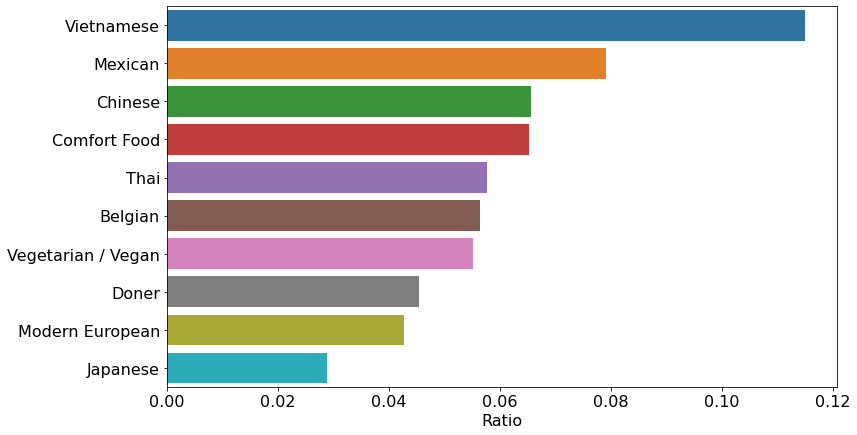

In [26]:
plt.figure(figsize=(12, 7))

top10_new = category_count2.loc[0:9]
sns.barplot(x="Ratio-cn", y="Category", data=top10_new)
plt.ylabel("")
plt.xlabel("Ratio",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#### Merge two ratios

In [27]:
categories_cn = category_count2.merge(rest_types, left_on="Category", right_on="Category")
categories_cn.columns = ["Category", "Chinese Restaurants", "Toronto"]

increase = []
for r1,r2 in zip(categories_cn["Chinese Restaurants"], categories_cn["Toronto"]):
    increase.append((r1-r2))
    
categories_cn.insert(loc=3, column="Change", value=increase)
categories_cn

,Category,Chinese Restaurants,Toronto,Change
0,Vietnamese,0.114928,0.014538,0.100391
1,Mexican,0.079076,0.018456,0.060619
2,Chinese,0.065584,0.057455,0.008129
3,Comfort Food,0.065209,0.007774,0.057435
4,Thai,0.057589,0.019215,0.038374
5,Belgian,0.056465,0.000506,0.055959
6,Modern European,0.042723,0.002844,0.039879
7,Japanese,0.028857,0.036091,-0.007234
8,Falafel,0.028482,0.003097,0.025385
9,Middle Eastern,0.027983,0.020795,0.007187


In [28]:
label_cn = ["Near Chinese Restaurants"] * 10
label_area = ["Entire Toronto Area"] * 10
label_combined = label_cn + label_area
result10 = categories_cn.loc[0:9]
temp_cn = result10[["Category","Chinese Restaurants"]]
temp_cn.rename(columns={"Chinese Restaurants":"Ratio"}, inplace=True)
temp_toronto = result10[["Category","Toronto"]]
temp_toronto.rename(columns={"Toronto":"Ratio"},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [29]:
df2 = pd.concat([temp_cn, temp_toronto], axis=0)
df2.insert(loc=2, column="Data Scope", value=label_combined)
df2

,Category,Ratio,Data Scope
0,Vietnamese,0.114928,Near Chinese Restaurants
1,Mexican,0.079076,Near Chinese Restaurants
2,Chinese,0.065584,Near Chinese Restaurants
3,Comfort Food,0.065209,Near Chinese Restaurants
4,Thai,0.057589,Near Chinese Restaurants
5,Belgian,0.056465,Near Chinese Restaurants
6,Modern European,0.042723,Near Chinese Restaurants
7,Japanese,0.028857,Near Chinese Restaurants
8,Falafel,0.028482,Near Chinese Restaurants
9,Middle Eastern,0.027983,Near Chinese Restaurants


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Vietnamese'),
  Text(0, 1, 'Mexican'),
  Text(0, 2, 'Chinese'),
  Text(0, 3, 'Comfort Food'),
  Text(0, 4, 'Thai'),
  Text(0, 5, 'Belgian'),
  Text(0, 6, 'Modern European'),
  Text(0, 7, 'Japanese'),
  Text(0, 8, 'Falafel'),
  Text(0, 9, 'Middle Eastern')])

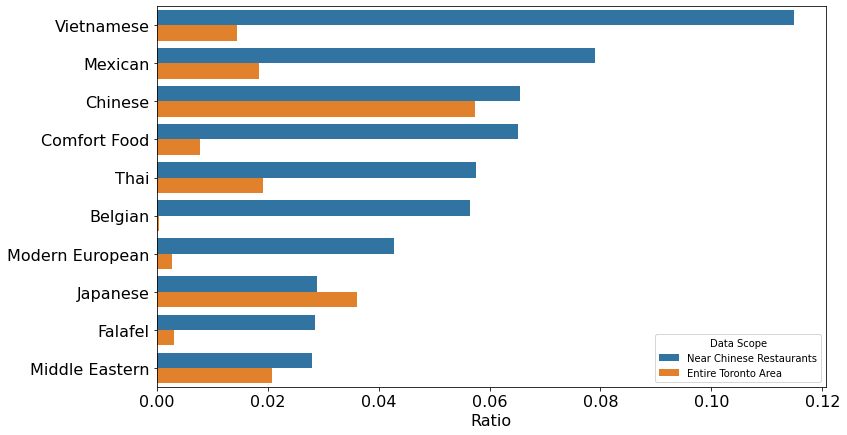

In [30]:
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(x="Ratio", y="Category", hue="Data Scope", data=df2)
plt.ylabel("")
plt.xlabel("Ratio",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

### OBSERRVATIONS

This figure above clearly demonstrate a different pattern of restaurants in the proximity of Chinese restaurants.

We can see that pizza restaurant is the most common restaurant in the greater Toronto area. However, this general trend is not applicable to the restaurants in the proximity of Chinese restaurants. Instead, food of Asian style is more common.

## Conclusion <a name="conclusion"></a>

There are many interesting things to note:

* The restaurants in the greater Toronto area are very diverse. The queries show that there are thousands of restaurants. They offer many choices to customers.
* The most common restaurant categories are pizza, sandwiches, Chinese, fast food, and Italian food.
* There are more restaurants in the downtown than the those far away from the city center.
* In the proximity of Chinese restaurants in Toronto area, the most common restaurants are Vietnamese, Mexican, and Chinese.